# Visual Q&A Demo

## Setup
1-Installs required packages   
2-Downloads sample data and a pretrained model.     

In [1]:
using Pkg; Pkg.activate("."); Pkg.instantiate(); #install required packages
include("demosetup.jl") 
include("src/main.jl")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Demo setup is completed


┌ Info: Recompiling stale cache file /Users/ekin/.julia/compiled/v1.1/Knet/f4vSz.ji for Knet [1902f260-5fb4-5aff-8c31-6271790ab950]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /Users/ekin/.julia/compiled/v1.1/KnetLayers/ZXBRh.ji for KnetLayers [80bfaf46-ad8a-11e8-19eb-a135e382307b]
└ @ Base loading.jl:1184


scalepixel (generic function with 1 method)

## Initialization
1-Loads the sample demo data (image features,questions,vocabulary).   
    * w2i : words to one-hot index   : w2i["cube"] = 30  
    * a2i : answer to one-hot index  : a2i["gray"] = 8
    * i2w : one-hot index to words   : i2w[2] = "Are"   
    * i2a : one-hot index to answers : i2a[5] = "large"   
2-Loads the pretrained model, and its hyper-parameters `o`.     

In [7]:
feats,qstsns,(w2i,a2i,i2w,i2a) = loadDemoData("data/demo/");
_,Mrun,o = loadmodel("models/macnet2.jld2";onlywrun=true);
value(params(Mrun)[1]) isa Array ? KnetLayers.settype!(Array) : KnetLayers.settype!(KnetArray)

Loading demo features ...
Loading demo questions ...
Loading dictionaries ...


Array{Float32,N} where N

## Sample Data
1-Randomly selects (question,image) pair from the sample data   
2-Make predictions for the question and checks whether the prediction is correct   

In [13]:
rnd        = rand(1:length(qstsns)) # try 41
inst       = qstsns[rnd]
feat       = arrtype(feats[:,:,:,rnd:rnd])
question   = Array{Int}(inst[2])
answer     = inst[3];
family     = inst[4];
results,prediction,interoutputs = singlerun(Mrun,feat,question;p=o[:p],selfattn=o[:selfattn],gating=o[:gating]);
answer==prediction[1]

true

In [41]:
interoutputs,prediction[1],answer

(Any[[8], [8], [23], [23], [23], [23], [23], [23], [23], [23], [10], [10]], 10, 10)

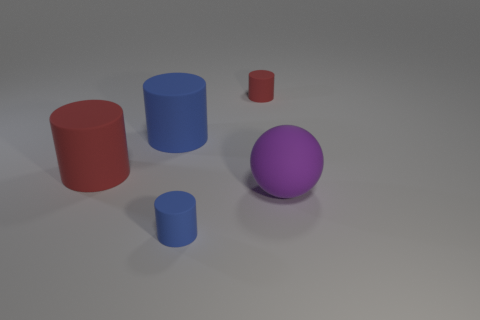

In [42]:
img = load("data/demo/CLEVR_v1.0/images/val/$(inst[1])")

In [43]:
textq  = i2w[question];
println("Question: ",join(textq," "))
texta  = i2a[answer];
println("Answer: $(texta)\nPrediction: $(i2a[prediction]) ")

Question: What is the color of the other small rubber thing that is the same shape as the small red thing ?
Answer: blue
Prediction: blue 


## User Data
You can enter your own question about the image and test whether the prediction is correct

In [44]:
userinput = readline(stdin)
words = split(userinput) # tokenize(userinput)
question = [get!(w2i,wr,1) for wr in words]
results,prediction = singlerun(Mrun,feat,question;p=o[:p],selfattn=o[:selfattn],gating=o[:gating]);
println("Question: $(join(i2w[question]," "))")
println("Prediction: $(i2a[prediction])")

stdin> What is the color of the other small rubber thing that is the same shape as the small red thing ?
Question: What is the color of the other small rubber thing that is the same shape as the small red thing ?
Prediction: blue


## Visualize
`visualize` function visualizes attention maps for each time step of the mac network

Image Attention Map 1: 


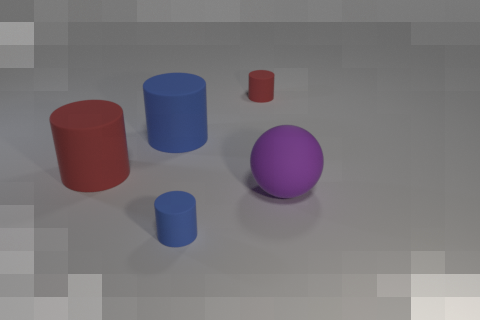

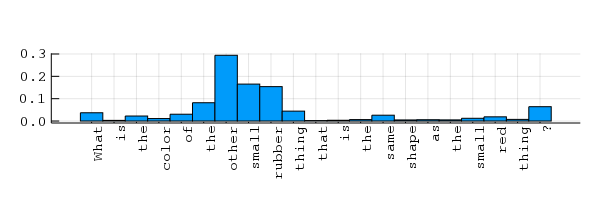

Image Attention Map 2: 


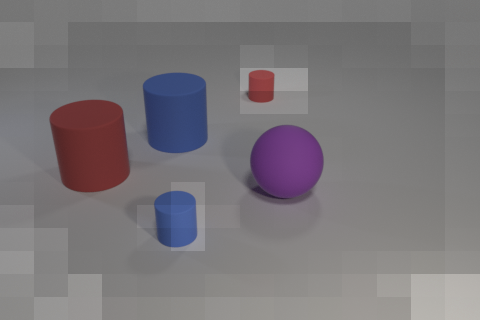

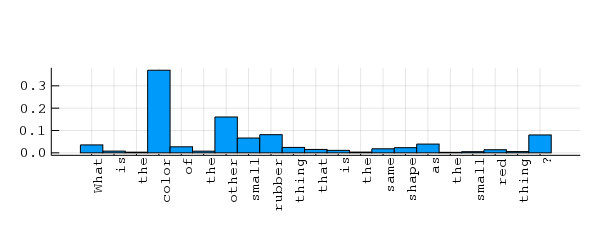

Image Attention Map 3: 


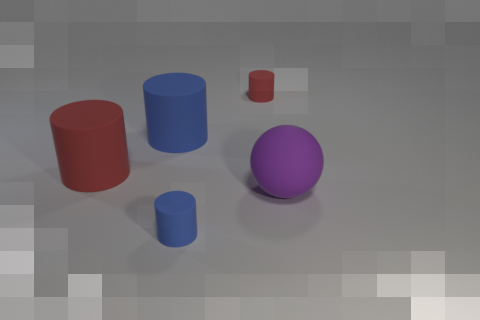

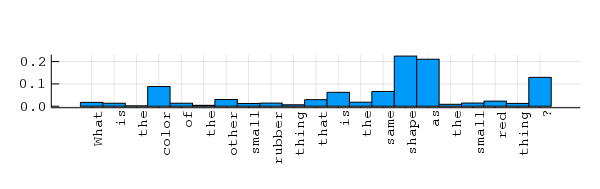

Image Attention Map 4: 


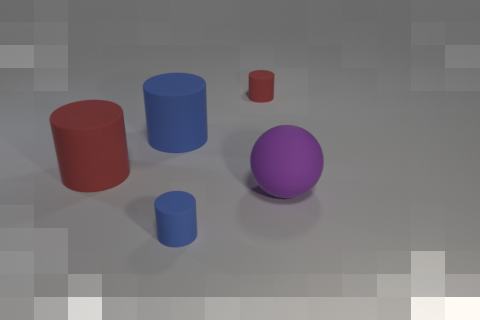

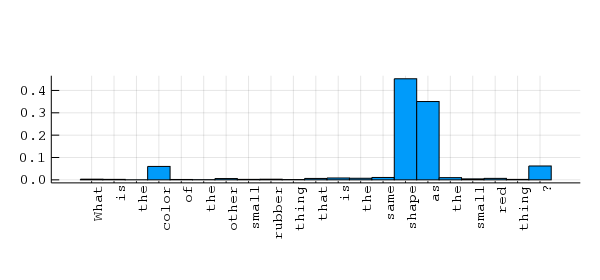

Image Attention Map 5: 


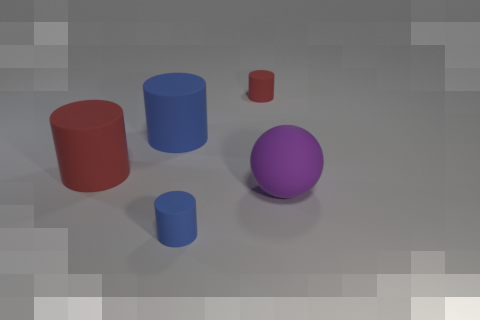

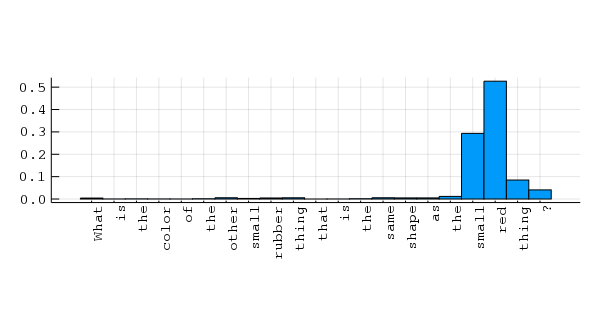

Image Attention Map 6: 


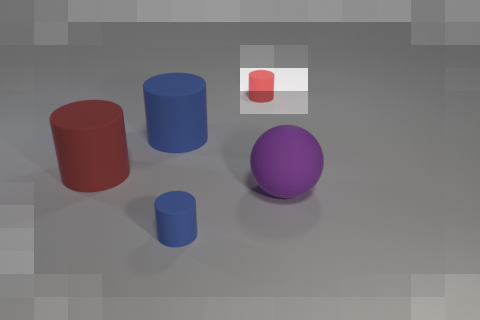

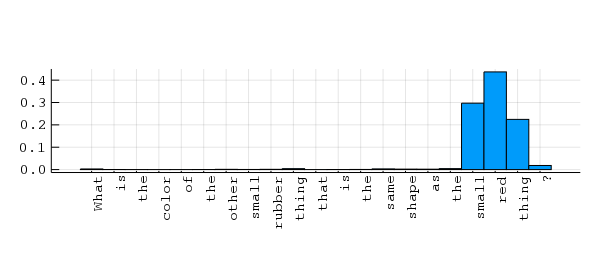

Image Attention Map 7: 


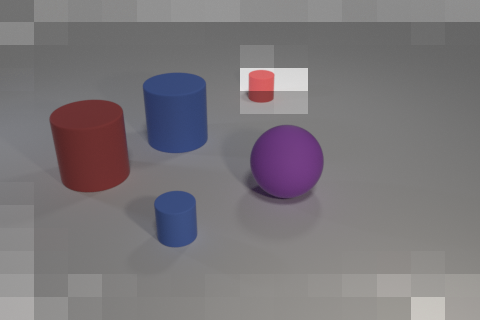

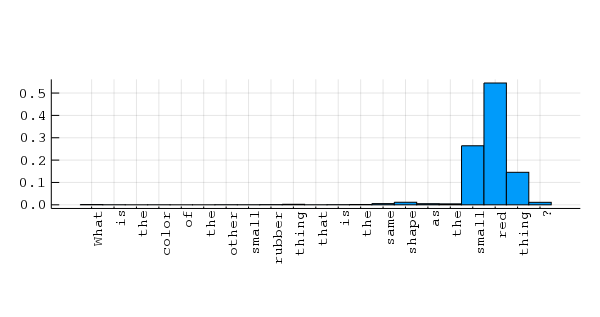

Image Attention Map 8: 


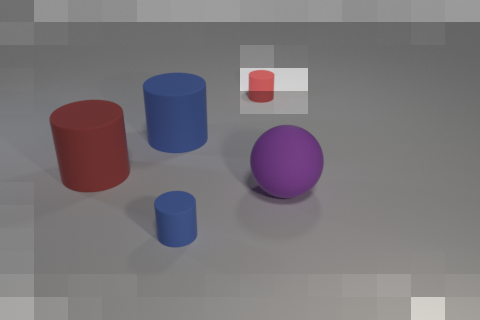

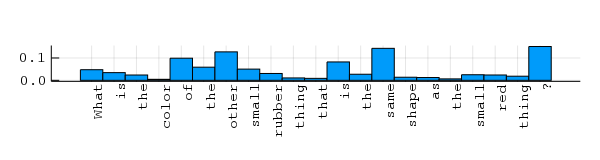

Image Attention Map 9: 


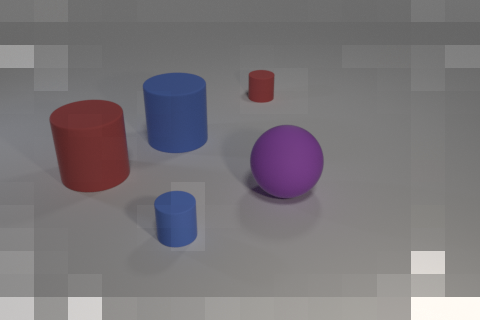

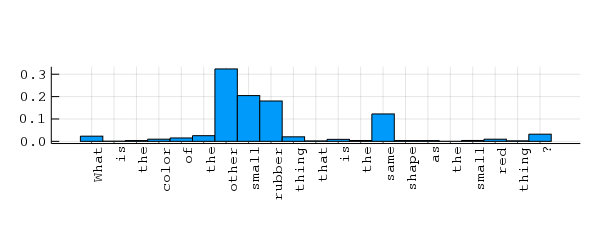

Image Attention Map 10: 


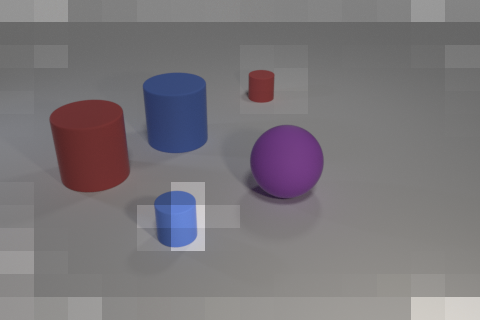

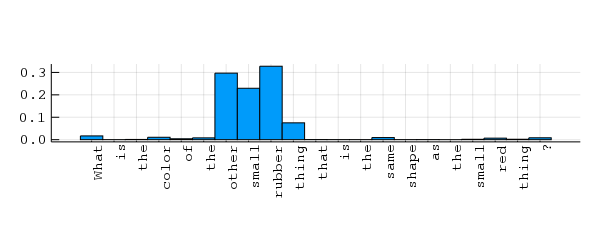

Image Attention Map 11: 


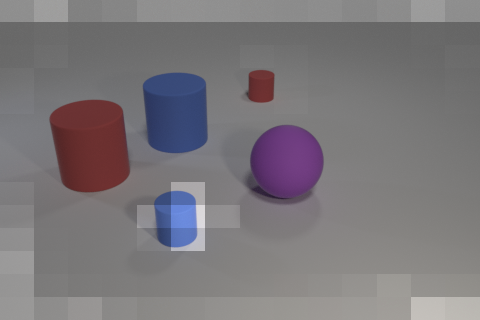

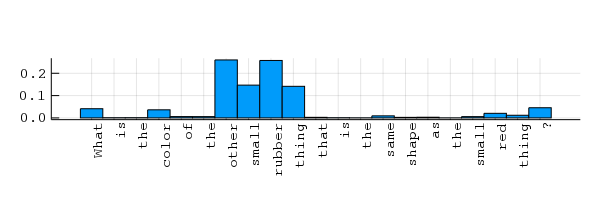

Image Attention Map 12: 


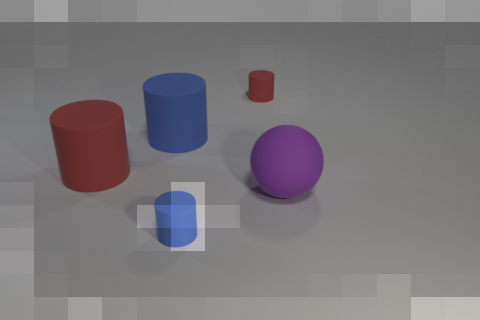

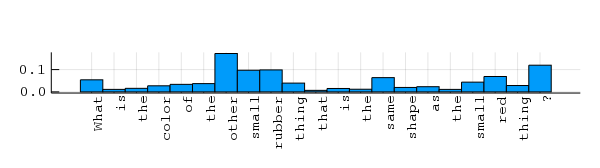

In [45]:
visualize(img,results;p=o[:p])